<a href="https://colab.research.google.com/github/Emilly-Rosa/Brazilian-E-Commerce-Analysis/blob/main/Brazilian_E_Commerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatórios de Dados: Olist e-Commerce

## Importando bibliotecas e o dataset do kaggle

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: emillycaroliny
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


100%|██████████| 42.6M/42.6M [00:00<00:00, 635MB/s]

In [ ]:
# bibliotecas necessárias
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl

In [ ]:
# importando os datasetsarquivos csv
clientes = pd.read_csv('brazilian-ecommerce/olist_customers_dataset.csv')
pedidosItens = pd.read_csv('brazilian-ecommerce/olist_order_items_dataset.csv')
pedidos = pd.read_csv('brazilian-ecommerce/olist_orders_dataset.csv')
produtos = pd.read_csv('brazilian-ecommerce/olist_products_dataset.csv')
pagamento = pd.read_csv('brazilian-ecommerce/olist_order_payments_dataset.csv')
vendedores = pd.read_csv('brazilian-ecommerce/olist_sellers_dataset.csv')
categoriaProduto = pd.read_csv('brazilian-ecommerce/product_category_name_translation.csv')
localização = pd.read_csv('brazilian-ecommerce/olist_geolocation_dataset.csv')
reviews = pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset.csv')

# Análise Exploratória

## Traduzindo Colunas

In [ ]:
clientes.rename(columns={
    'customer_id': 'id_cliente',
    'customer_unique_id': 'id_cliente_unico',
    'customer_zip_code_prefix': 'prefixo_cep_cliente',
    'customer_city': 'cidade_cliente',
    'customer_state': 'estado_cliente'
}, inplace=True)
display(clientes.head())

,id_cliente,id_cliente_unico,prefixo_cep_cliente,cidade_cliente,estado_cliente
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
pedidosItens.rename(columns={
    'order_id': 'id_pedido',
    'order_item_id': 'id_item_pedido',
    'product_id': 'id_produto',
    'seller_id': 'id_vendedor',
    'shipping_limit_date': 'data_limite_envio',
    'price': 'preco',
    'freight_value': 'valor_frete'
}, inplace=True)
display(pedidosItens.head())

,id_pedido,id_item_pedido,id_produto,id_vendedor,data_limite_envio,preco,valor_frete
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
pedidos.rename(columns={
    'order_id': 'id_pedido',
    'customer_id': 'id_cliente',
    'order_status': 'status_pedido',
    'order_purchase_timestamp': 'data_compra',
    'order_approved_at': 'data_aprovacao',
    'order_delivered_carrier_date': 'data_entrega_transportadora',
    'timestamp': 'data_entrega_transportadora',
    'order_delivered_customer_date': 'data_entrega_cliente',
    'order_estimated_delivery_date': 'data_entrega_estimada'
}, inplace=True)
display(pedidos.head())

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
produtos.rename(columns={
    'product_id': 'id_produto',
    'product_category_name': 'categoria_produto',
    'product_name_lenght': 'tamanho_nome_produto',
    'product_description_lenght': 'tamanho_descricao_produto',
    'product_photos_qty': 'quantidade_fotos_produto',
    'product_weight_g': 'peso_produto_g',
    'product_length_cm': 'comprimento_produto_cm',
    'product_height_cm': 'altura_produto_cm',
    'product_width_cm': 'largura_produto_cm'
}, inplace=True)
display(produtos.head())

,id_produto,categoria_produto,tamanho_nome_produto,tamanho_descricao_produto,quantidade_fotos_produto,peso_produto_g,comprimento_produto_cm,altura_produto_cm,largura_produto_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
vendedores.rename(columns={
    'seller_id': 'id_vendedor',
    'seller_zip_code_prefix': 'prefixo_cep_vendedor',
    'seller_city': 'cidade_vendedor',
    'seller_state': 'estado_vendedor'
}, inplace=True)
display(vendedores.head())

,id_vendedor,prefixo_cep_vendedor,cidade_vendedor,estado_vendedor
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
categoriaProduto.rename(columns={
    'product_category_name': 'categoria_produto',
    'product_category_name_english': 'categoria_produto_ingles'
}, inplace=True)
display(categoriaProduto.head())

,categoria_produto,categoria_produto_ingles
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
localização.rename(columns={
    'geolocation_zip_code_prefix': 'prefixo_cep',
    'geolocation_lat': 'latitude',
    'geolocation_lng': 'longitude',
    'geolocation_city': 'cidade',
    'geolocation_state': 'estado'
}, inplace=True)
display(localização.head())

,prefixo_cep,latitude,longitude,cidade,estado
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
pagamento.rename(columns={
    'order_id': 'id_pedido',
    'payment_sequential': 'sequencia_pagamento',
    'payment_type': 'tipo_pagamento',
    'payment_installments': 'parcelas_pagamento',
    'payment_value': 'valor_pagamento'
}, inplace=True)
display(pagamento.head())

,id_pedido,sequencia_pagamento,tipo_pagamento,parcelas_pagamento,valor_pagamento
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
reviews.rename(columns={
    'review_id': 'id_review',
    'order_id': 'id_pedido',
    'review_score': 'nota_review',
    'review_comment_title': 'titulo_comentario_review',
    'review_comment_message': 'mensagem_comentario_review',
    'review_creation_date': 'data_criacao_review',
    'review_answer_timestamp': 'timestamp_resposta_review'
}, inplace=True)
display(reviews.head())

,id_review,id_pedido,nota_review,titulo_comentario_review,mensagem_comentario_review,data_criacao_review,timestamp_resposta_review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Categorias

### Clientes

In [ ]:
clientes.head()

,id_cliente,id_cliente_unico,prefixo_cep_cliente,cidade_cliente,estado_cliente
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_cliente           99441 non-null  object
 1   id_cliente_unico     99441 non-null  object
 2   prefixo_cep_cliente  99441 non-null  int64 
 3   cidade_cliente       99441 non-null  object
 4   estado_cliente       99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
clientes.shape

(99441, 5)

###Pedidos

In [ ]:
pedidos.head()

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_pedido                    99441 non-null  object
 1   id_cliente                   99441 non-null  object
 2   status_pedido                99441 non-null  object
 3   data_compra                  99441 non-null  object
 4   data_aprovacao               99281 non-null  object
 5   data_entrega_transportadora  97658 non-null  object
 6   data_entrega_cliente         96476 non-null  object
 7   data_entrega_estimada        99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
pedidos.describe()

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
pedidos.shape

(99441, 8)

In [ ]:
pedidos['status_pedido'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
pedidos['status_pedido'].value_counts()

,count
status_pedido,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [ ]:
pedidos.isnull().sum()

,0
id_pedido,0
id_cliente,0
status_pedido,0
data_compra,0
data_aprovacao,160
data_entrega_transportadora,1783
data_entrega_cliente,2965
data_entrega_estimada,0


### Itens dos Pedidos

In [ ]:
pedidosItens.head()

,id_pedido,id_item_pedido,id_produto,id_vendedor,data_limite_envio,preco,valor_frete
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
pedidosItens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_pedido          112650 non-null  object 
 1   id_item_pedido     112650 non-null  int64  
 2   id_produto         112650 non-null  object 
 3   id_vendedor        112650 non-null  object 
 4   data_limite_envio  112650 non-null  object 
 5   preco              112650 non-null  float64
 6   valor_frete        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
pedidosItens.describe()

,id_item_pedido,preco,valor_frete
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
pedidosItens.shape

(112650, 7)

In [ ]:
media = pedidosItens['preco'].mean()
mediana = pedidosItens['preco'].median()

print(f"A média de gastos por pedido é: {media}")
print(f"A mediana de gastos por pedido é: {mediana}")

A média de gastos por pedido é: 120.65373901464716
A mediana de gastos por pedido é: 74.99


### Produtos

In [ ]:
produtos.head()

,id_produto,categoria_produto,tamanho_nome_produto,tamanho_descricao_produto,quantidade_fotos_produto,peso_produto_g,comprimento_produto_cm,altura_produto_cm,largura_produto_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_produto                 32951 non-null  object 
 1   categoria_produto          32341 non-null  object 
 2   tamanho_nome_produto       32341 non-null  float64
 3   tamanho_descricao_produto  32341 non-null  float64
 4   quantidade_fotos_produto   32341 non-null  float64
 5   peso_produto_g             32949 non-null  float64
 6   comprimento_produto_cm     32949 non-null  float64
 7   altura_produto_cm          32949 non-null  float64
 8   largura_produto_cm         32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
produtos.shape

(32951, 9)

In [ ]:
produtos.nunique()

,0
id_produto,32951
categoria_produto,73
tamanho_nome_produto,66
tamanho_descricao_produto,2960
quantidade_fotos_produto,19
peso_produto_g,2204
comprimento_produto_cm,99
altura_produto_cm,102
largura_produto_cm,95


In [ ]:
produtos['categoria_produto'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [ ]:
contagem_produtos = produtos['categoria_produto'].value_counts()

In [ ]:
contagem_produtos.head(10)

,count
categoria_produto,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


### Pagamento

In [ ]:
pagamento.head()

,id_pedido,sequencia_pagamento,tipo_pagamento,parcelas_pagamento,valor_pagamento
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
pagamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_pedido            103886 non-null  object 
 1   sequencia_pagamento  103886 non-null  int64  
 2   tipo_pagamento       103886 non-null  object 
 3   parcelas_pagamento   103886 non-null  int64  
 4   valor_pagamento      103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
pagamento.describe()

,sequencia_pagamento,parcelas_pagamento,valor_pagamento
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
pagamento.shape

(103886, 5)

In [ ]:
pagamento.nunique()

,0
id_pedido,99440
sequencia_pagamento,29
tipo_pagamento,5
parcelas_pagamento,24
valor_pagamento,29077


In [ ]:
pagamento['tipo_pagamento'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

### Vendedores

In [ ]:
vendedores.head()

,id_vendedor,prefixo_cep_vendedor,cidade_vendedor,estado_vendedor
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_vendedor           3095 non-null   object
 1   prefixo_cep_vendedor  3095 non-null   int64 
 2   cidade_vendedor       3095 non-null   object
 3   estado_vendedor       3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
vendedores.describe()

,prefixo_cep_vendedor
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
vendedores.shape

(3095, 4)

In [ ]:
vendedores.nunique()

,0
id_vendedor,3095
prefixo_cep_vendedor,2246
cidade_vendedor,611
estado_vendedor,23


### Categoria dos Produtos

In [ ]:
categoriaProduto.head()

,categoria_produto,categoria_produto_ingles
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
categoriaProduto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   categoria_produto         71 non-null     object
 1   categoria_produto_ingles  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
categoriaProduto.describe()

,categoria_produto,categoria_produto_ingles
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Localização

In [ ]:
localização.head()

,prefixo_cep,latitude,longitude,cidade,estado
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
localização.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   prefixo_cep  1000163 non-null  int64  
 1   latitude     1000163 non-null  float64
 2   longitude    1000163 non-null  float64
 3   cidade       1000163 non-null  object 
 4   estado       1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
localização.describe()

,prefixo_cep,latitude,longitude
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
localização.nunique()

,0
prefixo_cep,19015
latitude,717360
longitude,717613
cidade,8011
estado,27


### Reviews

In [ ]:
reviews.head()

,id_review,id_pedido,nota_review,titulo_comentario_review,mensagem_comentario_review,data_criacao_review,timestamp_resposta_review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id_review                   99224 non-null  object
 1   id_pedido                   99224 non-null  object
 2   nota_review                 99224 non-null  int64 
 3   titulo_comentario_review    11568 non-null  object
 4   mensagem_comentario_review  40977 non-null  object
 5   data_criacao_review         99224 non-null  object
 6   timestamp_resposta_review   99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
reviews.describe()

,nota_review
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
reviews.shape

(99224, 7)

In [ ]:
reviews.nunique()

,0
id_review,98410
id_pedido,98673
nota_review,5
titulo_comentario_review,4527
mensagem_comentario_review,36159
data_criacao_review,636
timestamp_resposta_review,98248


In [ ]:
reviews.isnull().sum()

,0
id_review,0
id_pedido,0
nota_review,0
titulo_comentario_review,87656
mensagem_comentario_review,58247
data_criacao_review,0
timestamp_resposta_review,0


In [ ]:
# A média é a soma de todos os valores dividida pelo número de valores. É sensível a valores extremos (outliers).
# A mediana é o valor do meio em um conjunto de dados ordenado. É menos afetada por valores extremos.
media = reviews['nota_review'].mean()
mediana = reviews['nota_review'].median()


print(f"A média de notas é: {media}")
print(f"A mediana de notas é: {mediana}")

A média de notas é: 4.08642062404257
A mediana de notas é: 5.0


<Axes: ylabel='Frequency'>

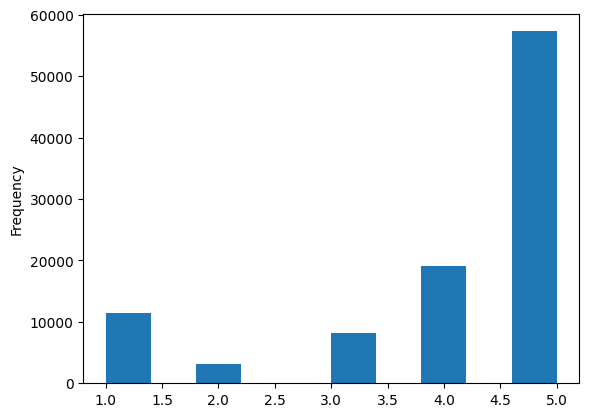

In [ ]:
reviews['nota_review'].plot(kind='hist')

# Integração

## Unindo os DataFrames

In [ ]:
# Unindo os dataframes

# Unir pedidos com clientes
df_merged = pd.merge(pedidos, clientes, on='id_cliente', how='left')

# Unir o resultado com pedidosItens
df_merged = pd.merge(df_merged, pedidosItens, on='id_pedido', how='left')

# Unir o resultado com produtos
df_merged = pd.merge(df_merged, produtos, on='id_produto', how='left')

# Unir o resultado com vendedores
df_merged = pd.merge(df_merged, vendedores, on='id_vendedor', how='left')

# Unir o resultado com pagamento
df_merged = pd.merge(df_merged, pagamento, on='id_pedido', how='left')

# Unir o resultado com reviews
df_merged = pd.merge(df_merged, reviews, on='id_pedido', how='left')

# Unir o resultado com categoriaProduto
df_merged = pd.merge(df_merged, categoriaProduto, on='categoria_produto', how='left')

display(df_merged.head())

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada,id_cliente_unico,prefixo_cep_cliente,...,tipo_pagamento,parcelas_pagamento,valor_pagamento,id_review,nota_review,titulo_comentario_review,mensagem_comentario_review,data_criacao_review,timestamp_resposta_review,categoria_produto_ingles
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto


In [ ]:
ecommerce = df_merged.copy()
display(ecommerce.head())

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada,id_cliente_unico,prefixo_cep_cliente,...,tipo_pagamento,parcelas_pagamento,valor_pagamento,id_review,nota_review,titulo_comentario_review,mensagem_comentario_review,data_criacao_review,timestamp_resposta_review,categoria_produto_ingles
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto


In [ ]:
display(ecommerce.columns)

Index(['id_pedido', 'id_cliente', 'status_pedido', 'data_compra',
       'data_aprovacao', 'data_entrega_transportadora', 'data_entrega_cliente',
       'data_entrega_estimada', 'id_cliente_unico', 'prefixo_cep_cliente',
       'cidade_cliente', 'estado_cliente', 'id_item_pedido', 'id_produto',
       'id_vendedor', 'data_limite_envio', 'preco', 'valor_frete',
       'categoria_produto', 'tamanho_nome_produto',
       'tamanho_descricao_produto', 'quantidade_fotos_produto',
       'peso_produto_g', 'comprimento_produto_cm', 'altura_produto_cm',
       'largura_produto_cm', 'prefixo_cep_vendedor', 'cidade_vendedor',
       'estado_vendedor', 'sequencia_pagamento', 'tipo_pagamento',
       'parcelas_pagamento', 'valor_pagamento', 'id_review', 'nota_review',
       'titulo_comentario_review', 'mensagem_comentario_review',
       'data_criacao_review', 'timestamp_resposta_review',
       'categoria_produto_ingles'],
      dtype='object')

In [ ]:
colunas_para_apagar = [
    'id_item_pedido',
    'id_review',
    'titulo_comentario_review',
    'categoria_produto_ingles',
    'prefixo_cep_cliente',
    'prefixo_cep_vendedor',
    'tamanho_nome_produto',
    'tamanho_descricao_produto',
    'quantidade_fotos_produto',
    'sequencia_pagamento',
    'timestamp_resposta_review',
    'altura_produto_cm',
    'largura_produto_cm',
    'comprimento_produto_cm',
    'peso_produto_g',
    'data_criacao_review'
]

ecommerce = ecommerce.drop(columns=colunas_para_apagar)
display(ecommerce.head())

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada,id_cliente_unico,cidade_cliente,...,preco,valor_frete,categoria_produto,cidade_vendedor,estado_vendedor,tipo_pagamento,parcelas_pagamento,valor_pagamento,nota_review,mensagem_comentario_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,credit_card,1.0,18.12,4.0,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,voucher,1.0,2.00,4.0,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,voucher,1.0,18.59,4.0,"Não testei o produto ainda, mas ele veio corre..."
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,...,118.70,22.76,perfumaria,belo horizonte,SP,boleto,1.0,141.46,4.0,Muito bom o produto.
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,...,159.90,19.22,automotivo,guariba,SP,credit_card,3.0,179.12,5.0,NaN


# Tratamento dos Dados

## Tratando os nulos

In [ ]:
ecommerce.isnull().sum()

,0
id_pedido,0
id_cliente,0
status_pedido,0
data_compra,0
data_aprovacao,177
data_entrega_transportadora,2086
data_entrega_cliente,3421
data_entrega_estimada,0
id_cliente_unico,0
cidade_cliente,0


In [ ]:
# Filtrando as linhas onde 'data_aprovacao' é nulo
nulos_data_aprovacao = ecommerce[ecommerce['data_aprovacao'].isnull()]

# Verificando a distribuição de 'status_pedido' nessas linhas
display(nulos_data_aprovacao['status_pedido'].value_counts())

,count
status_pedido,
canceled,157
delivered,15
created,5


In [ ]:
# Filtrando para casos onde data_aprovacao é nulo e status_pedido é 'delivered' ou 'created'
casos_incomuns_aprovacao = ecommerce[
    ecommerce['data_aprovacao'].isnull() &
    (ecommerce['status_pedido'].isin(['delivered', 'created']))
]

# Removendo esses casos do dataframe principal
ecommerce = ecommerce.drop(casos_incomuns_aprovacao.index)

# Exibindo o número de linhas restantes para confirmar a remoção
display(ecommerce.shape)

(119123, 24)

In [ ]:
display(ecommerce.columns)

Index(['id_pedido', 'id_cliente', 'status_pedido', 'data_compra',
       'data_aprovacao', 'data_entrega_transportadora', 'data_entrega_cliente',
       'data_entrega_estimada', 'id_cliente_unico', 'cidade_cliente',
       'estado_cliente', 'id_produto', 'id_vendedor', 'data_limite_envio',
       'preco', 'valor_frete', 'categoria_produto', 'cidade_vendedor',
       'estado_vendedor', 'tipo_pagamento', 'parcelas_pagamento',
       'valor_pagamento', 'nota_review', 'mensagem_comentario_review'],
      dtype='object')

In [ ]:
# Descartando linhas com valores nulos na coluna 'id_produto'
ecommerce.dropna(subset=['id_produto'], inplace=True)

# Exibindo o número de linhas restantes para confirmar a remoção
display(ecommerce.shape)

(118295, 24)

In [ ]:
# Filtrando as linhas onde 'data_entrega_cliente' é nulo
nulos_data_entrega_cliente = ecommerce[ecommerce['data_entrega_cliente'].isnull()]

# Verificando a distribuição de 'status_pedido' nessas linhas
display(nulos_data_entrega_cliente['status_pedido'].value_counts())

,count
status_pedido,
shipped,1255
canceled,563
invoiced,376
processing,376
delivered,8
unavailable,7
approved,3


In [ ]:
ecommerce.shape

(118295, 24)

In [ ]:
# Filtrando para casos onde data_entrega_cliente é nulo e status_pedido é 'delivered'
casos_incomuns_entrega = ecommerce[
    ecommerce['data_entrega_cliente'].isnull() &
    (ecommerce['status_pedido'] == 'delivered')
]

# Removendo esses casos do dataframe principal
ecommerce = ecommerce.drop(casos_incomuns_entrega.index)

# Exibindo o número de linhas restantes para confirmar a remoção
display(ecommerce.shape)

(118287, 24)

In [ ]:
# Filtrando as linhas onde 'data_entrega_transportadora' é nulo
nulos_data_entrega_transportadora = ecommerce[ecommerce['data_entrega_transportadora'].isnull()]

# Verificando a distribuição de 'status_pedido' nessas linhas
display(nulos_data_entrega_cliente['status_pedido'].value_counts())

,count
status_pedido,
shipped,1255
canceled,563
invoiced,376
processing,376
delivered,8
unavailable,7
approved,3


In [ ]:
# Filtrando para casos onde data_entrega_transportadora é nulo e status_pedido é 'delivered'
casos_incomuns_entrega = ecommerce[
    ecommerce['data_entrega_transportadora'].isnull() &
    (ecommerce['status_pedido'] == 'delivered')
]

# Removendo esses casos do dataframe principal
ecommerce = ecommerce.drop(casos_incomuns_entrega.index)

# Exibindo o número de linhas restantes para confirmar a remoção
display(ecommerce.shape)

(118286, 24)

In [ ]:
# Filtrando as linhas onde 'data_limite_envio' OU 'id_produto' era nulo no dataframe original (df_merged)
nulos_limite_envio_ou_id_produto = df_merged[
    df_merged['data_limite_envio'].isnull() | df_merged['id_produto'].isnull()
]

# Exibindo as colunas 'id_produto', 'data_limite_envio' e 'status_pedido' para essas linhas
display(nulos_limite_envio_ou_id_produto[['id_produto', 'data_limite_envio', 'status_pedido']])

,id_produto,data_limite_envio,status_pedido
319,NaN,NaN,unavailable
702,NaN,NaN,unavailable
828,NaN,NaN,unavailable
887,NaN,NaN,unavailable
1362,NaN,NaN,canceled
...,...,...,...
118914,NaN,NaN,unavailable
118946,NaN,NaN,canceled
119039,NaN,NaN,canceled
119040,NaN,NaN,unavailable


In [ ]:
ecommerce.shape


(118286, 24)

In [ ]:
# Descartando linhas com valores nulos nas colunas de pagamento
colunas_pagamento = ['tipo_pagamento', 'parcelas_pagamento', 'valor_pagamento']
ecommerce.dropna(subset=colunas_pagamento, inplace=True)

# Exibindo o número de linhas restantes para confirmar a remoção
display(ecommerce.shape)

(118283, 24)

In [ ]:
ecommerce.isnull().sum()

,0
id_pedido,0
id_cliente,0
status_pedido,0
data_compra,0
data_aprovacao,0
data_entrega_transportadora,1252
data_entrega_cliente,2580
data_entrega_estimada,0
id_cliente_unico,0
cidade_cliente,0


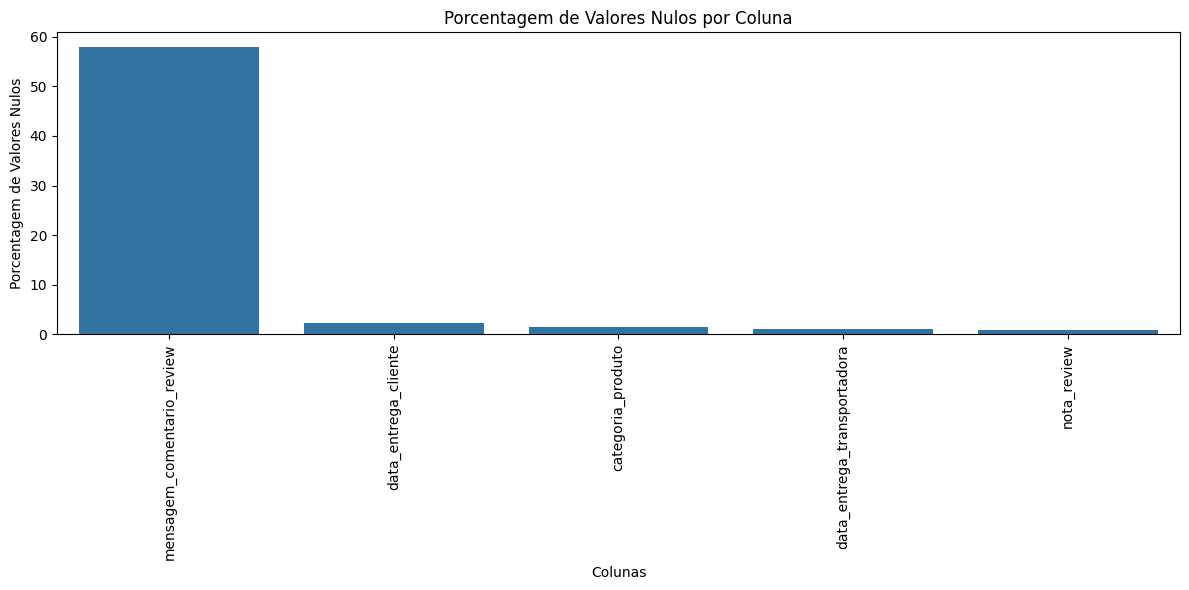

In [ ]:
# Calcular a porcentagem de valores nulos por coluna
percentual_nulos = ecommerce.isnull().sum() / len(ecommerce) * 100

# Filtrar apenas as colunas com valores nulos (opcional, para focar no que importa)
percentual_nulos = percentual_nulos[percentual_nulos > 0].sort_values(ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=percentual_nulos.index, y=percentual_nulos.values)
plt.xticks(rotation=90)
plt.xlabel('Colunas')
plt.ylabel('Porcentagem de Valores Nulos')
plt.title('Porcentagem de Valores Nulos por Coluna')
plt.tight_layout()
plt.show()

In [ ]:
ecommerce.to_csv('ecommerce_limpo.csv', index=False)
print("DataFrame 'ecommerce' salvo como 'ecommerce_limpo.csv'")

DataFrame 'ecommerce' salvo como 'ecommerce_limpo.csv'


## Convertendo colunas de data

In [ ]:
ecommerce.head()

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada,id_cliente_unico,cidade_cliente,...,preco,valor_frete,categoria_produto,cidade_vendedor,estado_vendedor,tipo_pagamento,parcelas_pagamento,valor_pagamento,nota_review,mensagem_comentario_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,credit_card,1.0,18.12,4.0,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,voucher,1.0,2.00,4.0,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,voucher,1.0,18.59,4.0,"Não testei o produto ainda, mas ele veio corre..."
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,...,118.70,22.76,perfumaria,belo horizonte,SP,boleto,1.0,141.46,4.0,Muito bom o produto.
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,...,159.90,19.22,automotivo,guariba,SP,credit_card,3.0,179.12,5.0,NaN


In [ ]:
# Colunas de data a serem convertidas
colunas_data = [
    'data_compra',
    'data_aprovacao',
    'data_entrega_transportadora',
    'data_entrega_cliente',
    'data_entrega_estimada',
    'data_limite_envio'
]

# Converter as colunas para o tipo datetime
for col in colunas_data:
    ecommerce[col] = pd.to_datetime(ecommerce[col], errors='coerce')

# Verificar os tipos de dados após a conversão
display(ecommerce.info())

<class 'pandas.core.frame.DataFrame'>
Index: 118283 entries, 0 to 119142
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id_pedido                    118283 non-null  object        
 1   id_cliente                   118283 non-null  object        
 2   status_pedido                118283 non-null  object        
 3   data_compra                  118283 non-null  datetime64[ns]
 4   data_aprovacao               118283 non-null  datetime64[ns]
 5   data_entrega_transportadora  117031 non-null  datetime64[ns]
 6   data_entrega_cliente         115703 non-null  datetime64[ns]
 7   data_entrega_estimada        118283 non-null  datetime64[ns]
 8   id_cliente_unico             118283 non-null  object        
 9   cidade_cliente               118283 non-null  object        
 10  estado_cliente               118283 non-null  object        
 11  id_produto                   11

None

# Engenharia de Features

## Criando novas colunas

In [ ]:
# Criando a nova coluna 'valor_total_pedido'
ecommerce['valor_total_pedido'] = ecommerce['preco'] + ecommerce['valor_frete']

display(ecommerce[['preco', 'valor_frete', 'valor_total_pedido']].head())

,preco,valor_frete,valor_total_pedido
0,29.99,8.72,38.71
1,29.99,8.72,38.71
2,29.99,8.72,38.71
3,118.70,22.76,141.46
4,159.90,19.22,179.12


In [ ]:
# Calcular o ticket médio por cliente único
ticket_medio_cliente = ecommerce.groupby('id_cliente_unico')['valor_total_pedido'].mean().reset_index()
ticket_medio_cliente.rename(columns={'valor_total_pedido': 'ticket_medio_cliente'}, inplace=True)

ecommerce = pd.merge(ecommerce, ticket_medio_cliente, on='id_cliente_unico', how='left')


display(ecommerce[['id_cliente_unico', 'valor_total_pedido', 'ticket_medio_cliente']].head())

,id_cliente_unico,valor_total_pedido,ticket_medio_cliente
0,7c396fd4830fd04220f754e42b4e5bff,38.71,40.06
1,7c396fd4830fd04220f754e42b4e5bff,38.71,40.06
2,7c396fd4830fd04220f754e42b4e5bff,38.71,40.06
3,af07308b275d755c9edb36a90c618231,141.46,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,179.12,179.12


In [ ]:
# Novas colunas de mês e ano
ecommerce['mes_compra'] = ecommerce['data_compra'].dt.month

ecommerce['ano_compra'] = ecommerce['data_compra'].dt.year

display(ecommerce[['data_compra', 'mes_compra', 'ano_compra']].head())

,data_compra,mes_compra,ano_compra
0,2017-10-02 10:56:33,10,2017
1,2017-10-02 10:56:33,10,2017
2,2017-10-02 10:56:33,10,2017
3,2018-07-24 20:41:37,7,2018
4,2018-08-08 08:38:49,8,2018


In [ ]:
# Criando a coluna 'lead_time_total'
ecommerce['lead_time_total'] = (ecommerce['data_entrega_cliente'] - ecommerce['data_compra']).dt.days
ecommerce['lead_time_total'] = ecommerce['lead_time_total'].astype('Int64')

display(ecommerce[['data_compra', 'data_entrega_cliente', 'lead_time_total']].head())

,data_compra,data_entrega_cliente,lead_time_total
0,2017-10-02 10:56:33,2017-10-10 21:25:13,8
1,2017-10-02 10:56:33,2017-10-10 21:25:13,8
2,2017-10-02 10:56:33,2017-10-10 21:25:13,8
3,2018-07-24 20:41:37,2018-08-07 15:27:45,13
4,2018-08-08 08:38:49,2018-08-17 18:06:29,9


In [ ]:
nulos_lead_time = ecommerce[ecommerce['lead_time_total'].isnull()]

display(nulos_lead_time['status_pedido'].value_counts())

,count
status_pedido,
shipped,1255
canceled,563
invoiced,376
processing,376
unavailable,7
approved,3


In [ ]:
# Nova coluna 'entrega_no_prazo'
# 1 se a entrega foi no prazo (data_entrega_cliente <= data_entrega_estimada)
# 0 se a entrega atrasou (data_entrega_cliente > data_entrega_estimada)
# Nulo se a data de entrega ao cliente for nula
ecommerce['entrega_no_prazo'] = (ecommerce['data_entrega_cliente'] <= ecommerce['data_entrega_estimada']).astype(int)

display(ecommerce[['data_entrega_cliente', 'data_entrega_estimada', 'entrega_no_prazo']].head())

,data_entrega_cliente,data_entrega_estimada,entrega_no_prazo
0,2017-10-10 21:25:13,2017-10-18,1
1,2017-10-10 21:25:13,2017-10-18,1
2,2017-10-10 21:25:13,2017-10-18,1
3,2018-08-07 15:27:45,2018-08-13,1
4,2018-08-17 18:06:29,2018-09-04,1


In [ ]:
# Criando a coluna 'dias_atraso'
# Calculando a diferença em dias apenas para entregas atrasadas
ecommerce['dias_atraso'] = (ecommerce['data_entrega_cliente'] - ecommerce['data_entrega_estimada']).dt.days

# Definindo dias_atraso como 0 para entregas no prazo ou não entregues
ecommerce.loc[ecommerce['entrega_no_prazo'] == 1, 'dias_atraso'] = 0
ecommerce.loc[ecommerce['data_entrega_cliente'].isnull(), 'dias_atraso'] = pd.NA # Usando pd.NA para nulos

display(ecommerce[['data_entrega_cliente', 'data_entrega_estimada', 'entrega_no_prazo', 'dias_atraso']].head())

,data_entrega_cliente,data_entrega_estimada,entrega_no_prazo,dias_atraso
0,2017-10-10 21:25:13,2017-10-18,1,0.0
1,2017-10-10 21:25:13,2017-10-18,1,0.0
2,2017-10-10 21:25:13,2017-10-18,1,0.0
3,2018-08-07 15:27:45,2018-08-13,1,0.0
4,2018-08-17 18:06:29,2018-09-04,1,0.0


In [ ]:
# Calcular a quantidade de pedidos por cliente único
qtd_pedidos_cliente_df = ecommerce.groupby('id_cliente_unico')['id_pedido'].nunique().reset_index()

qtd_pedidos_cliente_df.rename(columns={'id_pedido': 'qtd_pedidos_cliente'}, inplace=True)
ecommerce = pd.merge(ecommerce, qtd_pedidos_cliente_df, on='id_cliente_unico', how='left')

display(ecommerce[['id_cliente_unico', 'qtd_pedidos_cliente']].head())

,id_cliente_unico,qtd_pedidos_cliente
0,7c396fd4830fd04220f754e42b4e5bff,2
1,7c396fd4830fd04220f754e42b4e5bff,2
2,7c396fd4830fd04220f754e42b4e5bff,2
3,af07308b275d755c9edb36a90c618231,1
4,3a653a41f6f9fc3d2a113cf8398680e8,1


In [ ]:
# cliente_recorrente (binário: 1 se qtd_pedidos_cliente > 1)
ecommerce['cliente_recorrente'] = (ecommerce['qtd_pedidos_cliente'] > 1).astype(int)

display(ecommerce[['id_cliente_unico', 'qtd_pedidos_cliente', 'cliente_recorrente']].head())

,id_cliente_unico,qtd_pedidos_cliente,cliente_recorrente
0,7c396fd4830fd04220f754e42b4e5bff,2,1
1,7c396fd4830fd04220f754e42b4e5bff,2,1
2,7c396fd4830fd04220f754e42b4e5bff,2,1
3,af07308b275d755c9edb36a90c618231,1,0
4,3a653a41f6f9fc3d2a113cf8398680e8,1,0


In [ ]:
# Nova coluna binária 'pagamento_parcelado' (binária: parcelas > 1)
ecommerce['pagamento_parcelado'] = (ecommerce['parcelas_pagamento'] > 1).astype(int)

display(ecommerce[['parcelas_pagamento', 'pagamento_parcelado']].head())

,parcelas_pagamento,pagamento_parcelado
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,3.0,1


In [ ]:
# Criando a nova coluna 'valor_medio_parcela'
ecommerce['valor_medio_parcela'] = ecommerce['valor_pagamento'] / ecommerce['parcelas_pagamento'].replace(0, np.nan)
pd.options.display.float_format = '{:.2f}'.format

display(ecommerce[['valor_pagamento', 'parcelas_pagamento', 'valor_medio_parcela']].head())

,valor_pagamento,parcelas_pagamento,valor_medio_parcela
0,18.12,1.00,18.12
1,2.00,1.00,2.00
2,18.59,1.00,18.59
3,141.46,1.00,141.46
4,179.12,3.00,59.71


In [ ]:
ecommerce.head()

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada,id_cliente_unico,cidade_cliente,...,ticket_medio_cliente,mes_compra,ano_compra,lead_time_total,entrega_no_prazo,dias_atraso,qtd_pedidos_cliente,cliente_recorrente,pagamento_parcelado,valor_medio_parcela
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,40.06,10,2017,8,1,0.00,2,1,0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,40.06,10,2017,8,1,0.00,2,1,0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,40.06,10,2017,8,1,0.00,2,1,0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,...,141.46,7,2018,13,1,0.00,1,0,0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,...,179.12,8,2018,9,1,0.00,1,0,1,59.71


# Perguntas e Respostas

## Vendas & Receita

### Qual é o faturamento total no período disponível?

In [ ]:
# Calculando o faturamento total
faturamento_total = ecommerce['valor_total_pedido'].sum()

print(f"O faturamento total no período disponível é: R$ {faturamento_total:.2f}")

O faturamento total no período disponível é: R$ 16640060.34


### Como se distribui o ticket médio por pedido e por cliente único?

In [ ]:
# Distribuição do ticket médio por pedido
print("Distribuição do Ticket Médio por Pedido:")
display(ecommerce['valor_total_pedido'].describe())

Distribuição do Ticket Médio por Pedido:


,valor_total_pedido
count,118283.00
mean,140.68
std,191.26
min,6.08
25%,55.24
50%,91.99
75%,157.60
max,6929.31


In [ ]:
# 1. Agrupar por cliente único e somar o valor total dos pedidos
gasto_total_por_cliente = ecommerce.groupby('id_cliente_unico')['valor_total_pedido'].sum().reset_index()
gasto_total_por_cliente.rename(columns={'valor_total_pedido': 'gasto_total_cliente'}, inplace=True)

# Exibir o gasto total por cliente
print("Gasto Total por Cliente Único (Primeiras 5 linhas):")
display(gasto_total_por_cliente.head())

# 2. Calcular o número de pedidos por cliente único (já temos em qtd_pedidos_cliente_df, mas podemos recalcular aqui para ilustrar)
# qtd_pedidos_por_cliente = ecommerce.groupby('id_cliente_unico')['id_pedido'].nunique().reset_index()
# qtd_pedidos_por_cliente.rename(columns={'id_pedido': 'num_pedidos_cliente'}, inplace=True)

# 3. Calcular o ticket médio por cliente (gasto total / num pedidos - OU - média do valor total dos pedidos)
# A média do valor total dos pedidos por cliente é o que calculamos em ticket_medio_cliente_unico
ticket_medio_cliente_calculado = ecommerce.groupby('id_cliente_unico')['valor_total_pedido'].mean().reset_index()
ticket_medio_cliente_calculado.rename(columns={'valor_total_pedido': 'ticket_medio_cliente_unico_calculado'}, inplace=True)

# Exibir o ticket médio por cliente (calculado pela média dos pedidos)
print("\nTicket Médio por Cliente Único (Calculado pela média dos pedidos - Primeiras 5 linhas):")
display(ticket_medio_cliente_calculado.head())

# 4. Calcular a média geral entre clientes (a média da coluna ticket_medio_cliente_unico_calculado)
media_geral_ticket_medio_cliente = ticket_medio_cliente_calculado['ticket_medio_cliente_unico_calculado'].mean()

print(f"\nMédia Geral do Ticket Médio por Cliente Único: R$ {media_geral_ticket_medio_cliente:.2f}")

# Nota: O ticket médio por cliente (média das médias dos pedidos por cliente) é a métrica que você descreveu.
# A média geral do ticket médio por cliente único (calculada acima) é a média desses valores.

Gasto Total por Cliente Único (Primeiras 5 linhas):


,id_cliente_unico,gasto_total_cliente
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89



Ticket Médio por Cliente Único (Calculado pela média dos pedidos - Primeiras 5 linhas):


,id_cliente_unico,ticket_medio_cliente_unico_calculado
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89



Média Geral do Ticket Médio por Cliente Único: R$ 146.75


In [ ]:
print("Comparação da Distribuição do Ticket Médio:")
print("\nTicket Médio por Pedido (valor_total_pedido):")
display(ecommerce['valor_total_pedido'].describe())

print("\nTicket Médio por Cliente Único (ticket_medio_cliente):")
display(ecommerce['ticket_medio_cliente'].describe())

# Opcional: Comparar as médias e medianas diretamente
print(f"\nMédia do Ticket Médio por Pedido: R$ {ecommerce['valor_total_pedido'].mean():.2f}")
print(f"Mediana do Ticket Médio por Pedido: R$ {ecommerce['valor_total_pedido'].median():.2f}")
print(f"Média do Ticket Médio por Cliente Único: R$ {ecommerce['ticket_medio_cliente'].mean():.2f}")
print(f"Mediana do Ticket Médio por Cliente Único: R$ {ecommerce['ticket_medio_cliente'].median():.2f}")

Comparação da Distribuição do Ticket Médio:

Ticket Médio por Pedido (valor_total_pedido):


,valor_total_pedido
count,118283.00
mean,140.68
std,191.26
min,6.08
25%,55.24
50%,91.99
75%,157.60
max,6929.31



Ticket Médio por Cliente Único (ticket_medio_cliente):


,ticket_medio_cliente
count,118283.00
mean,140.68
std,189.65
min,9.34
25%,56.72
50%,92.76
75%,157.34
max,6929.31



Média do Ticket Médio por Pedido: R$ 140.68
Mediana do Ticket Médio por Pedido: R$ 91.99
Média do Ticket Médio por Cliente Único: R$ 140.68
Mediana do Ticket Médio por Cliente Único: R$ 92.76


In [ ]:
# Checando o número de clientes recorrentes já que os resultados estavam muito parecidos
# A maioria dos clientes fizeram uma única compra no site
contagem_clientes_recorrencia = ecommerce.groupby('cliente_recorrente')['id_cliente_unico'].nunique().reset_index()

contagem_clientes_recorrencia['cliente_recorrente'] = contagem_clientes_recorrencia['cliente_recorrente'].map({0: 'Cliente Único', 1: 'Cliente Recorrente'})

print("Proporção de Clientes por Recorrência:")
display(contagem_clientes_recorrencia)

Proporção de Clientes por Recorrência:


,cliente_recorrente,id_cliente_unico
0,Cliente Único,92485
1,Cliente Recorrente,2912


### Quais são as categorias de produtos mais vendidas em volume e em receita?

In [ ]:
# Contar o número de itens por categoria de produto
volume_por_categoria = ecommerce['categoria_produto'].value_counts().reset_index()

volume_por_categoria.columns = ['categoria_produto', 'volume_vendas']

print("Top 10 Categorias de Produtos por Volume de Vendas:")
display(volume_por_categoria.head(10))

Top 10 Categorias de Produtos por Volume de Vendas:


,categoria_produto,volume_vendas
0,cama_mesa_banho,11987
1,beleza_saude,10029
2,esporte_lazer,9001
3,moveis_decoracao,8828
4,informatica_acessorios,8149
5,utilidades_domesticas,7380
6,relogios_presentes,6211
7,telefonia,4724
8,ferramentas_jardim,4589
9,automotivo,4399


/tmp/ipython-input-1917633777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_produto', y='volume_vendas', data=volume_por_categoria.head(10), palette='viridis')


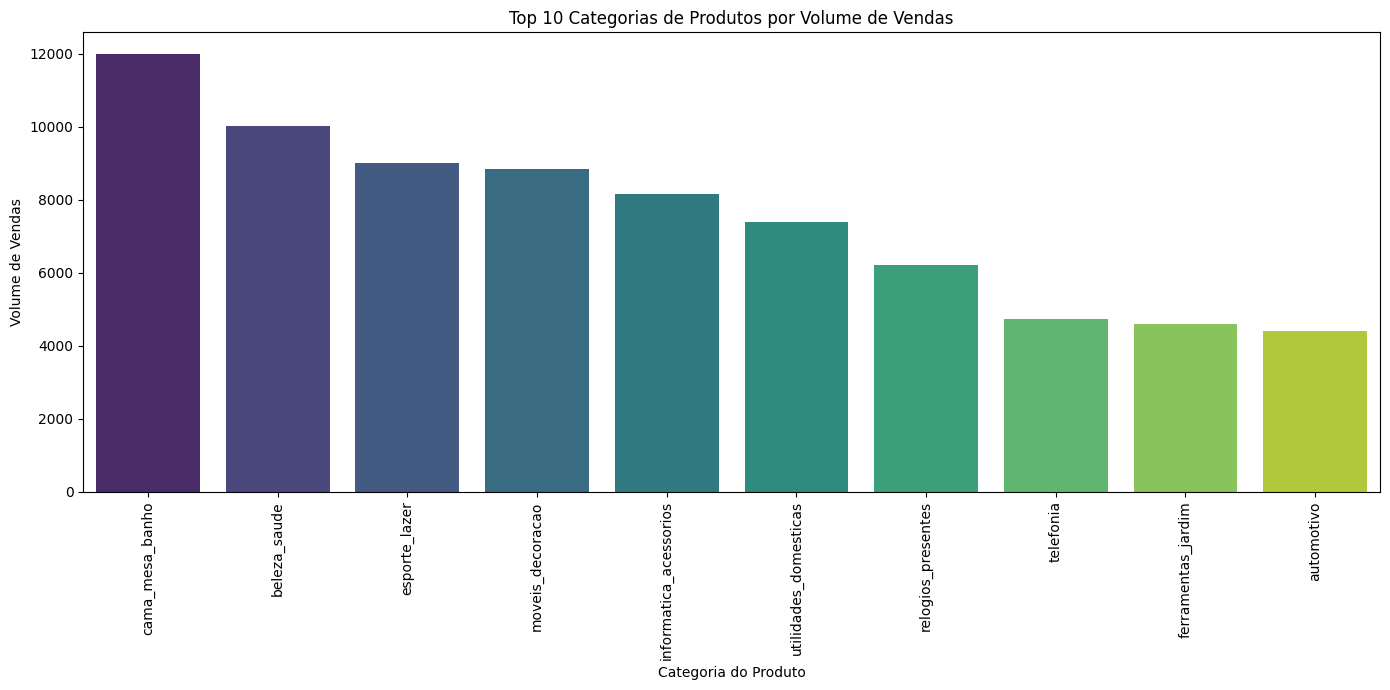

In [ ]:
# Top 10 - Vendas por volume
plt.figure(figsize=(14, 7))
sns.barplot(x='categoria_produto', y='volume_vendas', data=volume_por_categoria.head(10), palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Categoria do Produto')
plt.ylabel('Volume de Vendas')
plt.title('Top 10 Categorias de Produtos por Volume de Vendas')
plt.tight_layout()
plt.show()

In [ ]:
# Receita total por categoria de produto
receita_por_categoria = ecommerce.groupby('categoria_produto')['valor_total_pedido'].sum().reset_index()

receita_por_categoria.columns = ['categoria_produto', 'receita_total']

receita_por_categoria = receita_por_categoria.sort_values(by='receita_total', ascending=False)

print("Top 10 Categorias de Produtos por Receita:")
display(receita_por_categoria.head(10))

Top 10 Categorias de Produtos por Receita:


,categoria_produto,receita_total
11,beleza_saude,1491254.30
66,relogios_presentes,1358529.45
13,cama_mesa_banho,1327504.83
32,esporte_lazer,1204909.39
44,informatica_acessorios,1104241.91
54,moveis_decoracao,954872.33
72,utilidades_domesticas,823623.50
26,cool_stuff,752392.83
8,automotivo,714297.12
40,ferramentas_jardim,625233.08


/tmp/ipython-input-4175237415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_produto', y='receita_total', data=receita_por_categoria.head(10), palette='viridis')


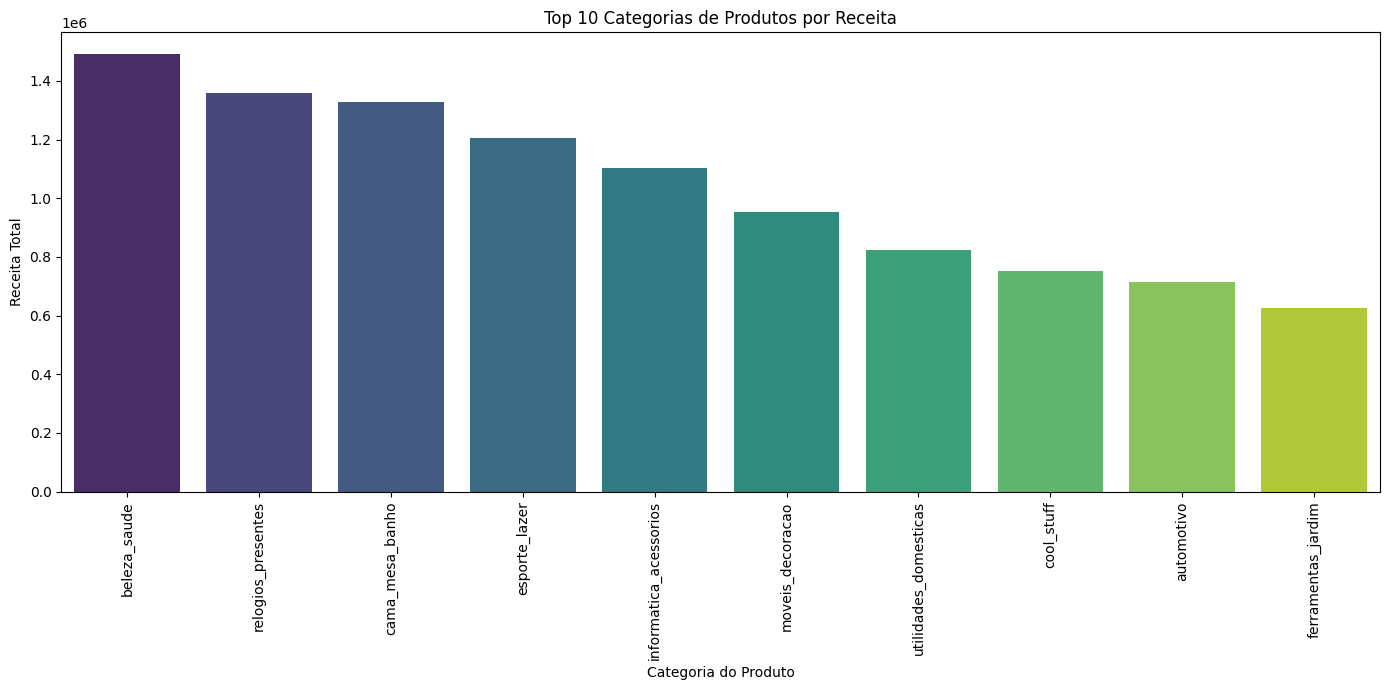

In [ ]:
# Criar um gráfico de barras para visualizar a receita total por categoria (Top 10)
plt.figure(figsize=(14, 7))
sns.barplot(x='categoria_produto', y='receita_total', data=receita_por_categoria.head(10), palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Categoria do Produto')
plt.ylabel('Receita Total')
plt.title('Top 10 Categorias de Produtos por Receita')
plt.tight_layout()
plt.show()

### O faturamento varia muito entre estados e cidades? Onde temos mais força?

In [ ]:
# Faturamento total por estado do cliente
faturamento_por_estado = ecommerce.groupby('estado_cliente')['valor_total_pedido'].sum().reset_index()

faturamento_por_estado.columns = ['estado_cliente', 'faturamento_total']

faturamento_por_estado = faturamento_por_estado.sort_values(by='faturamento_total', ascending=False)

print("Faturamento Total por Estado do Cliente:")
display(faturamento_por_estado)

Faturamento Total por Estado do Cliente:


,estado_cliente,faturamento_total
25,SP,6232339.04
18,RJ,2246905.52
10,MG,1928279.38
22,RS,933538.70
17,PR,832059.40
4,BA,650220.38
23,SC,632514.14
8,GO,368997.61
6,DF,367750.15
7,ES,336438.54


In [ ]:
# Faturamento total por cidade (Top 10)
faturamento_por_cidade = ecommerce.groupby('cidade_cliente')['valor_total_pedido'].sum().reset_index()

faturamento_por_cidade.columns = ['cidade_cliente', 'faturamento_total']

faturamento_por_cidade = faturamento_por_cidade.sort_values(by='faturamento_total', ascending=False)

print("Top 10 Cidades do Cliente por Faturamento Total:")
display(faturamento_por_cidade.head(10))

Top 10 Cidades do Cliente por Faturamento Total:


,cidade_cliente,faturamento_total
3588,sao paulo,2289920.16
3147,rio de janeiro,1207917.40
452,belo horizonte,432683.29
557,brasilia,366678.41
1141,curitiba,253307.86
3239,salvador,236516.12
2956,porto alegre,231307.78
705,campinas,223510.56
1526,guarulhos,176018.77
2455,niteroi,155257.38


## Logística e Entregas

### Qual é o tempo médio entre a compra e a entrega ao cliente?

In [ ]:
# Calcular o tempo médio entre a compra e a entrega ao cliente
tempo_medio_entrega = ecommerce['lead_time_total'].mean()

print(f"O tempo médio entre a compra e a entrega ao cliente é de aproximadamente {tempo_medio_entrega:.2f} dias.")

O tempo médio entre a compra e a entrega ao cliente é de aproximadamente 12.02 dias.


### Quantos pedidos foram entregues dentro do prazo estimado e quantos atrasaram?

In [ ]:
# Contar os pedidos entregues no prazo e atrasados
contagem_entrega_prazo = ecommerce['entrega_no_prazo'].value_counts(dropna=False).reset_index()

contagem_entrega_prazo.columns = ['status_entrega', 'numero_pedidos']

contagem_entrega_prazo['status_entrega'] = contagem_entrega_prazo['status_entrega'].map({1: 'No Prazo', 0: 'Atrasado', pd.NA: 'Não Entregue'})

print("Número de Pedidos por Status de Entrega:")
display(contagem_entrega_prazo)

# Porcentagem
total_pedidos = len(ecommerce)
contagem_entrega_prazo['percentual'] = (contagem_entrega_prazo['numero_pedidos'] / total_pedidos) * 100

print("\nPorcentagem de Pedidos por Status de Entrega:")
display(contagem_entrega_prazo)

Número de Pedidos por Status de Entrega:


,status_entrega,numero_pedidos
0,No Prazo,106639
1,Atrasado,11644



Porcentagem de Pedidos por Status de Entrega:


,status_entrega,numero_pedidos,percentual
0,No Prazo,106639,90.16
1,Atrasado,11644,9.84


In [ ]:
# Filtrar os pedidos que foram entregues com atraso
pedidos_atrasados = ecommerce[ecommerce['entrega_no_prazo'] == 0]

atrasos_por_estado = pedidos_atrasados.groupby('estado_cliente').size().reset_index(name='numero_atrasos')

atrasos_por_estado = atrasos_por_estado.sort_values(by='numero_atrasos', ascending=False)

print("Estados com o maior número de entregas atrasadas:")
display(atrasos_por_estado)

Estados com o maior número de entregas atrasadas:


,estado_cliente,numero_atrasos
25,SP,3801
18,RJ,2395
10,MG,944
4,BA,661
22,RS,542
23,SC,484
17,PR,375
7,ES,314
5,CE,278
15,PE,249


In [ ]:
# 1. Calcular o número total de pedidos por estado do cliente
total_pedidos_por_estado = ecommerce.groupby('estado_cliente')['id_pedido'].nunique().reset_index()
total_pedidos_por_estado.rename(columns={'id_pedido': 'total_pedidos'}, inplace=True)

# 2. Unir com a contagem de atrasos por estado (dataframe 'atrasos_por_estado' já foi criado)
comparativo_atrasos_percentual = pd.merge(atrasos_por_estado, total_pedidos_por_estado, on='estado_cliente', how='left')

# 3. Calcular a porcentagem de atrasos sobre o total de pedidos
comparativo_atrasos_percentual['percentual_atrasos'] = (comparativo_atrasos_percentual['numero_atrasos'] / comparativo_atrasos_percentual['total_pedidos']) * 100

print("Comparativo de Quantidade de Pedidos, Atrasos e Percentual de Atrasos por Estado:")
display(comparativo_atrasos_percentual.sort_values(by='percentual_atrasos', ascending=False))

Comparativo de Quantidade de Pedidos, Atrasos e Percentual de Atrasos por Estado:


,estado_cliente,numero_atrasos,total_pedidos,percentual_atrasos
14,AL,126,411,30.66
12,MA,192,739,25.98
23,RR,11,46,23.91
16,PI,108,493,21.91
8,CE,278,1326,20.97
20,SE,72,345,20.87
3,BA,661,3358,19.68
1,RJ,2395,12760,18.77
13,PA,161,970,16.60
18,PB,88,532,16.54


### Existe diferença significativa de prazo entre estados/regiões do Brasil?

In [ ]:
# Tempo médio de entrega por estado do cliente
tempo_medio_entrega_por_estado = ecommerce.groupby('estado_cliente')['lead_time_total'].mean().reset_index()

tempo_medio_entrega_por_estado.columns = ['estado_cliente', 'tempo_medio_entrega_dias']

tempo_medio_entrega_por_estado = tempo_medio_entrega_por_estado.sort_values(by='tempo_medio_entrega_dias')
print("Tempo Médio de Entrega por Estado do Cliente:")
display(tempo_medio_entrega_por_estado)

Tempo Médio de Entrega por Estado do Cliente:


,estado_cliente,tempo_medio_entrega_dias
25,SP,8.27
10,MG,11.50
17,PR,11.52
6,DF,12.50
23,SC,14.51
22,RS,14.70
18,RJ,14.78
8,GO,14.90
11,MS,15.06
7,ES,15.24


### Quais vendedores têm maior índice de atrasos na entrega?

In [ ]:
# 1. Contar o total de pedidos por vendedor
total_pedidos_por_vendedor = ecommerce.groupby('id_vendedor')['id_pedido'].nunique().reset_index()
total_pedidos_por_vendedor.rename(columns={'id_pedido': 'total_pedidos_vendedor'}, inplace=True)

# 2. Filtrar os pedidos atrasados
pedidos_atrasados = ecommerce[ecommerce['entrega_no_prazo'] == 0]

# 3. Contar os pedidos atrasados por vendedor
atrasos_por_vendedor = pedidos_atrasados.groupby('id_vendedor').size().reset_index(name='numero_atrasos_vendedor')

# 4. Unir as informações de total de pedidos e atrasos por vendedor
comparativo_atrasos_vendedor = pd.merge(total_pedidos_por_vendedor, atrasos_por_vendedor, on='id_vendedor', how='left')

comparativo_atrasos_vendedor['numero_atrasos_vendedor'] = comparativo_atrasos_vendedor['numero_atrasos_vendedor'].fillna(0).astype(int)

# 5. Calcular o índice (porcentagem) de atrasos por vendedor
comparativo_atrasos_vendedor['indice_atraso'] = (comparativo_atrasos_vendedor['numero_atrasos_vendedor'] / (comparativo_atrasos_vendedor['total_pedidos_vendedor'] + 1e-6)) * 100

# 6. Ordenar por índice de atraso em ordem decrescente
vendedores_com_maior_indice_atraso = comparativo_atrasos_vendedor.sort_values(by='indice_atraso', ascending=False)

print("Top 10 Vendedores com Maior Índice de Atraso na Entrega:")
display(vendedores_com_maior_indice_atraso.head(10))

Top 10 Vendedores com Maior Índice de Atraso na Entrega:


,id_vendedor,total_pedidos_vendedor,numero_atrasos_vendedor,indice_atraso
705,3bfad056cf05c00dabe2f895925d83b1,1,5,500.00
2276,bcf5566870987da7bc811fbc8c5b9fd9,1,4,400.00
76,06532f10282704ef4c69168b914b77be,8,29,362.50
1952,a0e19590a0923cdd0614ea9427713ced,2,7,350.00
2859,ec8463980a4e0ea9f8517aea1ed0c419,2,6,300.00
653,37ceb404da208418c9032f0674e57804,1,3,300.00
1501,7a188843479798ca813108fa7b959286,1,3,300.00
251,15aec03fe4cf30dfa574cf550f5ff5ff,1,3,300.00
1255,66d5ae34537110d3affc56174dad2b2f,1,3,300.00
278,17adeba047385fb0c67d8e90b4296d21,1,3,300.00


## Clientes

### Qual é a proporção de clientes recorrentes versus clientes únicos?

In [ ]:
contagem_clientes_recorrencia = ecommerce.groupby('cliente_recorrente')['id_cliente_unico'].nunique().reset_index()

contagem_clientes_recorrencia['cliente_recorrente'] = contagem_clientes_recorrencia['cliente_recorrente'].map({0: 'Cliente Único', 1: 'Cliente Recorrente'})

print("Proporção de Clientes por Recorrência:")
display(contagem_clientes_recorrencia)

total_clientes_unicos = ecommerce['id_cliente_unico'].nunique()
contagem_clientes_recorrencia['percentual'] = (contagem_clientes_recorrencia['id_cliente_unico'] / total_clientes_unicos) * 100

print("\nProporção de Clientes por Recorrência (Percentual):")
display(contagem_clientes_recorrencia)

Proporção de Clientes por Recorrência:


,cliente_recorrente,id_cliente_unico
0,Cliente Único,92485
1,Cliente Recorrente,2912



Proporção de Clientes por Recorrência (Percentual):


,cliente_recorrente,id_cliente_unico,percentual
0,Cliente Único,92485,96.95
1,Cliente Recorrente,2912,3.05


### Em quais estados temos mais clientes ativos?

In [ ]:
clientes_por_estado = ecommerce.groupby('estado_cliente')['id_cliente_unico'].nunique().reset_index()

clientes_por_estado.columns = ['estado_cliente', 'numero_clientes_unicos']

clientes_por_estado = clientes_por_estado.sort_values(by='numero_clientes_unicos', ascending=False)

print("Estados com o Maior Número de Clientes Únicos:")
display(clientes_por_estado)

Estados com o Maior Número de Clientes Únicos:


,estado_cliente,numero_clientes_unicos
25,SP,39968
18,RJ,12301
10,MG,11175
22,RS,5246
17,PR,4840
23,SC,3513
4,BA,3257
6,DF,2062
7,ES,1956
8,GO,1942


### Existe algum perfil de cliente (cidade/estado) que compra em maior quantidade ou gasta mais?

In [ ]:
# Agrupar por estado e cidade do cliente e calcular métricas de compra
perfil_cliente_localizacao = ecommerce.groupby(['estado_cliente', 'cidade_cliente']).agg(
    numero_clientes=('id_cliente_unico', 'nunique'),  # Contar clientes únicos por local
    media_qtd_pedidos=('qtd_pedidos_cliente', 'mean'), # Média de pedidos por cliente no local
    media_ticket_medio=('ticket_medio_cliente', 'mean'), # Média do ticket médio por cliente no local
    total_gasto=('valor_total_pedido', 'sum') # Opcional: gasto total por local
).reset_index()

print("Perfil de Clientes por Local (Top 10 por Média de Pedidos):")
display(perfil_cliente_localizacao.sort_values(by='media_qtd_pedidos', ascending=False).head(10))

print("\nPerfil de Clientes por Local (Top 10 por Média de Ticket Médio por Cliente Único):")
display(perfil_cliente_localizacao.sort_values(by='media_ticket_medio', ascending=False).head(10))

Perfil de Clientes por Local (Top 10 por Média de Pedidos):


,estado_cliente,cidade_cliente,numero_clientes,media_qtd_pedidos,media_ticket_medio,total_gasto
840,GO,planaltina de goias,1,3.00,70.61,131.61
1975,PA,rio maria,1,3.00,154.49,772.45
602,DF,guara,1,3.00,61.70,130.99
121,BA,barra do tarrachil,1,3.00,119.98,359.94
3725,SP,candido rodrigues,2,2.50,33.58,134.30
661,ES,montanha,7,2.50,155.23,1862.77
2144,PE,garanhuns,25,2.46,143.10,5580.98
160,BA,cansancao,5,2.33,106.77,1281.20
1843,MT,diamantino,4,2.25,70.26,562.11
3905,SP,joanopolis,4,2.14,166.68,1166.75



Perfil de Clientes por Local (Top 10 por Média de Ticket Médio por Cliente Único):


,estado_cliente,cidade_cliente,numero_clientes,media_qtd_pedidos,media_ticket_medio,total_gasto
2058,PB,pianco,1,1.00,2324.99,2324.99
1958,PA,nova esperanca do piria,1,1.00,2252.66,2252.66
1237,MG,engenheiro navarro,1,1.00,2106.55,2106.55
2095,PE,agrestina,1,1.00,2066.34,4132.68
2504,PR,mariental,1,1.00,1867.85,1867.85
937,MA,loreto,1,1.00,1643.64,1643.64
231,BA,ibitita,1,1.00,1534.58,1534.58
2695,RJ,boa esperanca,1,1.00,1527.51,3055.02
2061,PB,pirpirituba,1,1.00,1372.25,2744.50
3672,SP,barao ataliba nogueira,1,1.00,1351.51,1351.51


## Pagamentos

### Qual método de pagamento mais usado?

In [ ]:
metodo_pagamento_mais_usado = ecommerce['tipo_pagamento'].value_counts().reset_index()

metodo_pagamento_mais_usado.columns = ['tipo_pagamento', 'count']

total_pagamentos = metodo_pagamento_mais_usado['count'].sum()
metodo_pagamento_mais_usado['percentual'] = (metodo_pagamento_mais_usado['count'] / total_pagamentos) * 100

metodo_pagamento_mais_usado['percentual_formatado'] = metodo_pagamento_mais_usado['percentual'].map('{:.2f}%'.format)

print("Métodos de Pagamento Mais Usados:")
display(metodo_pagamento_mais_usado[['tipo_pagamento', 'count', 'percentual_formatado']])

Métodos de Pagamento Mais Usados:


,tipo_pagamento,count,percentual_formatado
0,credit_card,87250,73.76%
1,boleto,23003,19.45%
2,voucher,6332,5.35%
3,debit_card,1698,1.44%


### Qual é a média de parcelas escolhida pelos clientes?

In [ ]:
# Média de parcelas escolhida pelos clientes
media_parcelas = ecommerce['parcelas_pagamento'].mean()

print(f"A média de parcelas escolhida pelos clientes é de aproximadamente {media_parcelas:.2f}.")

A média de parcelas escolhida pelos clientes é de aproximadamente 2.94.


### Existe diferença no valor do pedido dependendo da forma de pagamento?

Diferença no Valor do Pedido por Forma de Pagamento:


,count,mean,std,min,25%,50%,75%,max
tipo_pagamento,,,,,,,,
boleto,23003.00,124.22,170.68,9.27,50.95,82.98,141.61,6922.21
credit_card,87250.00,146.42,197.33,6.08,57.53,96.05,163.41,6929.31
debit_card,1698.00,127.02,213.45,11.36,46.22,79.47,138.53,4163.51
voucher,6332.00,125.02,164.31,9.59,51.52,82.57,135.79,3297.40


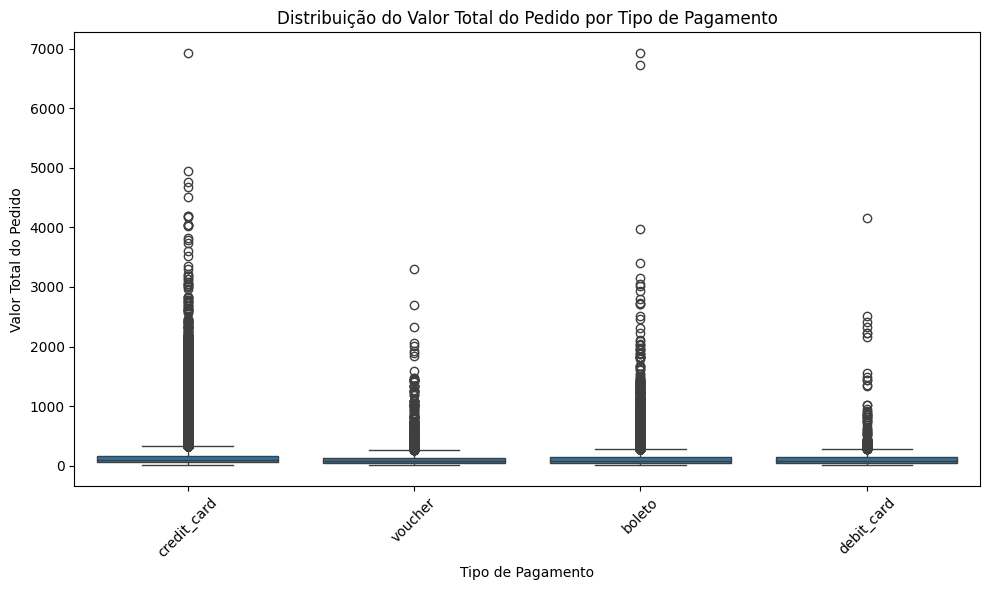

In [ ]:
# Agrupar por tipo de pagamento e calcular estatísticas descritivas do valor total do pedido
diferenca_valor_por_pagamento = ecommerce.groupby('tipo_pagamento')['valor_total_pedido'].describe()

print("Diferença no Valor do Pedido por Forma de Pagamento:")
display(diferenca_valor_por_pagamento)

plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo_pagamento', y='valor_total_pedido', data=ecommerce)
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Valor Total do Pedido')
plt.title('Distribuição do Valor Total do Pedido por Tipo de Pagamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Satisfação do Cliente

### Qual a média geral das notas de review?

In [ ]:
# Calculando a média das notas
media_geral_reviews = ecommerce['nota_review'].mean()

print(f"A média geral das notas de review é: {media_geral_reviews:.2f}")

A média geral das notas de review é: 4.03


/tmp/ipython-input-2751063028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nota_review', data=ecommerce, palette='viridis')


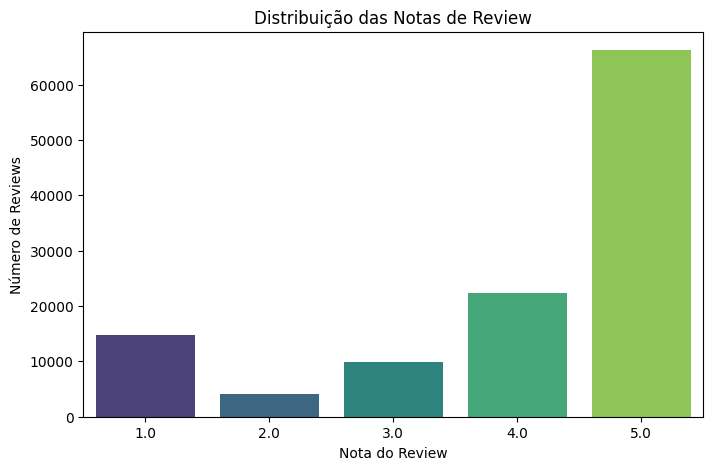

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='nota_review', data=ecommerce, palette='viridis')
plt.xlabel('Nota do Review')
plt.ylabel('Número de Reviews')
plt.title('Distribuição das Notas de Review')
plt.show()

### Quais categorias de produto apresentam melhores e piores avaliações?

In [ ]:
nota_media_por_categoria = ecommerce.groupby('categoria_produto')['nota_review'].mean().reset_index()

nota_media_por_categoria.columns = ['categoria_produto', 'media_nota_review']

categorias_bem_avaliadas = nota_media_por_categoria.sort_values(by='media_nota_review', ascending=False)

print("Top 10 Categorias de Produtos com Melhores Avaliações:")
display(categorias_bem_avaliadas.head(10))

Top 10 Categorias de Produtos com Melhores Avaliações:


,categoria_produto,media_nota_review
17,cds_dvds_musicais,4.64
37,fashion_roupa_infanto_juvenil,4.50
48,livros_interesse_geral,4.44
41,flores,4.42
47,livros_importados,4.42
22,construcao_ferramentas_ferramentas,4.42
49,livros_tecnicos,4.38
2,alimentos_bebidas,4.32
64,portateis_casa_forno_e_cafe,4.32
50,malas_acessorios,4.30


In [ ]:
categorias_mal_avaliadas = nota_media_por_categoria.sort_values(by='media_nota_review', ascending=True)

print("\nTop 10 Categorias de Produtos com Piores Avaliações:")
display(categorias_mal_avaliadas.head(10))


Top 10 Categorias de Produtos com Piores Avaliações:


,categoria_produto,media_nota_review
67,seguros_e_servicos,2.50
60,pc_gamer,3.10
42,fraldas_higiene,3.26
65,portateis_cozinha_e_preparadores_de_alimentos,3.27
55,moveis_escritorio,3.53
38,fashion_roupa_masculina,3.55
15,casa_conforto_2,3.64
71,telefonia_fixa,3.67
36,fashion_roupa_feminina,3.78
52,moveis_colchao_e_estofado,3.80


### Existe relação entre atraso na entrega e nota do review?

In [ ]:
# Calcular a média das notas de review para pedidos no prazo e atrasados
relacao_atraso_nota = ecommerce.groupby('entrega_no_prazo')['nota_review'].mean().reset_index()

relacao_atraso_nota['entrega_no_prazo'] = relacao_atraso_nota['entrega_no_prazo'].map({1: 'No Prazo', 0: 'Atrasado'})

print("Média das Notas de Review por Status de Entrega:")
display(relacao_atraso_nota)

Média das Notas de Review por Status de Entrega:


,entrega_no_prazo,nota_review
0,Atrasado,2.37
1,No Prazo,4.21


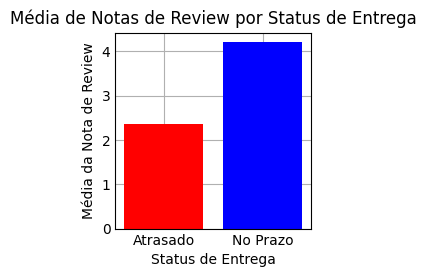

In [ ]:
data = {'entrega_no_prazo': ['Atrasado', 'No Prazo'], 'nota_review': [2.37, 4.21]}
relacao_atraso_nota = pd.DataFrame(data)

cores = ['red' if nota < 4.0 else 'blue' for nota in relacao_atraso_nota['nota_review']]

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots()

ax.bar(relacao_atraso_nota['entrega_no_prazo'], relacao_atraso_nota['nota_review'], color=cores)

ax.set_title('Média de Notas de Review por Status de Entrega')
ax.set_xlabel('Status de Entrega')
ax.set_ylabel('Média da Nota de Review')

plt.show()

### Quais são os principais padrões nos comentários de review (positivos ou negativos)?

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Top 20 palavras em comentários positivos (excluindo stop words):


,count
produto,11959
prazo,7859
antes,5913
entrega,5240
bom,4490
chegou,4479
recomendo,4243
bem,3071
qualidade,2497
entregue,2473



Top 20 palavras em comentários negativos (excluindo stop words):


,count
produto,7029
recebi,4828
comprei,2997
veio,2182
entregue,1921
ainda,1788
entrega,1682
chegou,1576
pedido,1233
nao,1207



Distribuição dos Scores de Sentimento (VADER):


,sentiment_score
count,49666.00
mean,-0.00
std,0.18
min,-0.90
25%,0.00
50%,0.00
75%,0.00
max,0.91


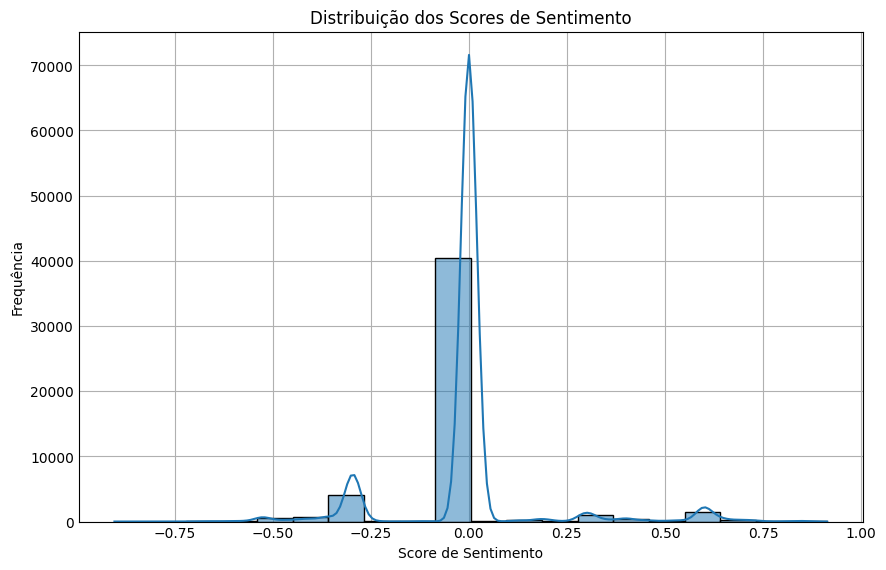

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import re

try:
    nltk.data.find('sentiment/vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

positive_reviews = ecommerce[ecommerce['nota_review'] >= 4]['mensagem_comentario_review'].dropna()
negative_reviews = ecommerce[ecommerce['nota_review'] <= 2]['mensagem_comentario_review'].dropna()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

positive_reviews_processed = positive_reviews.apply(preprocess_text)
negative_reviews_processed = negative_reviews.apply(preprocess_text)

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    if pd.isna(text):
        return None
    return analyzer.polarity_scores(str(text))['compound']
ecommerce['sentiment_score'] = ecommerce['mensagem_comentario_review'].apply(get_sentiment_score)

stop_words = set(stopwords.words('portuguese'))

def get_word_frequency(text_series):
    words = ' '.join(text_series).split()
    words = [word for word in words if word not in stop_words]
    return pd.Series(words).value_counts()

print("Top 20 palavras em comentários positivos (excluindo stop words):")
display(get_word_frequency(positive_reviews_processed).head(20))

print("\nTop 20 palavras em comentários negativos (excluindo stop words):")
display(get_word_frequency(negative_reviews_processed).head(20))

print("\nDistribuição dos Scores de Sentimento (VADER):")
display(ecommerce['sentiment_score'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(ecommerce['sentiment_score'].dropna(), bins=20, kde=True)
plt.xlabel('Score de Sentimento')
plt.ylabel('Frequência')
plt.title('Distribuição dos Scores de Sentimento')
plt.show()